### Based on the engagement analysis + the experience analysis you will do satisfaction analysis

In [322]:
#importing pandas & numpy libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import math
import plotly.express as px

# Disable warnings
import warnings
warnings.filterwarnings('ignore')

In [323]:
teledata = pd.read_csv('engagement.csv', na_values=['?',"n.a.","NA","n/a", "na", None])

In [324]:
#dropping Unnamed column as we don't Need this 

teledata.drop(['Unnamed: 0'], axis=1, inplace=True)
teledata.head(5)

,Bearer Id,MSISDN/Number,Handset Manufacturer,Handset Type,Dur. (ms),Total Youtube Data,Total Google Data,Total Email Data,Total Netflix Data,Total Gaming Data,...,Total SocialMedia Data,Total DL and UL,Start ms,End ms,Start,End,Avg Delay (ms),Dur. (ms).1,Activity_Duration(ms),Avg Throughput (kbps)
0,1.311448e+19,3.368542e+10,Samsung,Samsung Galaxy A8 (2018),243504.0,32045297.0,7072799.0,3535210.0,28489330.0,522331573.0,...,2448331.0,599743023.0,467.0,829.0,1555910280000,1556153760000,127.458589,243504362.0,76881.0,69.0
1,1.311448e+19,3.366132e+10,Apple,Apple iPhone 7 (A1778),236570.0,36396501.0,5735801.0,3899599.0,21665509.0,725601428.0,...,3230386.0,798245704.0,641.0,444.0,1555913880000,1556150460000,53.000000,236570803.0,44070.0,92.0
2,1.311448e+19,3.361513e+10,Samsung,Samsung Galaxy Note 8 (Sm-N950F),231780.0,20593868.0,1000345.0,3209019.0,10640366.0,139148365.0,...,2570758.0,192095344.0,804.0,199.0,1555918680000,1556150460000,127.458589,231780395.0,69923.0,74.0
3,1.311448e+19,3.366495e+10,Huawei,Huawei P20 Lite Huawei Nova 3E,230839.0,17789231.0,9958686.0,3536943.0,19448226.0,294855187.0,...,2599788.0,359872820.0,676.0,176.0,1555919640000,1556150460000,41.000000,230839500.0,77180.0,68.0
4,7.349883e+18,3.366403e+10,Apple,Apple iPhone 6S Plus (A1687),238915.0,44496698.0,4721773.0,2498587.0,15073143.0,524941244.0,...,3489842.0,604428354.0,810.0,294.0,1555920000000,1556158920000,39.000000,238915484.0,189027.0,96.0


In [325]:
df = pd.read_csv('experienced_data.csv', na_values=['?',"n.a.","NA","n/a", "na", None])
df

,Unnamed: 0,Cluster,MSISDN/Number,Handset Type,Avg RTT DL (ms),Avg RTT UL (ms),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),Total_Avg_RTT,Total_Avg_Bearer_TP,Total_Avg_TCP
0,0,1,3.366496e+10,Samsung Galaxy A5 Sm-A520F,42.000000,5.000000,2.080991e+07,759658.664811,23.000000,44.000000,47.000000,46.000000,2.156957e+07
1,1,1,3.368185e+10,Samsung Galaxy J5 (Sm-J530),65.000000,5.000000,2.080991e+07,759658.664811,16.000000,26.000000,70.000000,32.000000,2.156957e+07
2,2,0,3.376063e+10,Samsung Galaxy A8 (2018),109.795706,17.662883,2.080991e+07,759658.664811,6.000000,9.000000,127.458589,12.000000,2.156957e+07
3,3,0,3.375034e+10,undefined,109.795706,17.662883,2.080991e+07,759658.664811,44.000000,44.000000,127.458589,88.000000,2.156957e+07
4,4,0,3.369980e+10,Samsung Sm-G390F,109.795706,17.662883,2.080991e+07,759658.664811,6.000000,9.000000,127.458589,12.000000,2.156957e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,149996,1,3.365069e+10,Apple iPhone 8 Plus (A1897),32.000000,0.000000,2.080991e+07,759658.664811,52.000000,65.000000,32.000000,104.000000,2.156957e+07
149997,149997,1,3.366345e+10,Apple iPhone Se (A1723),27.000000,2.000000,2.080991e+07,759658.664811,23.000000,54.000000,29.000000,46.000000,2.156957e+07
149998,149998,1,3.362189e+10,Apple iPhone Xs (A2097),43.000000,6.000000,2.080991e+07,759658.664811,43.000000,47.000000,49.000000,86.000000,2.156957e+07
149999,149999,1,3.361962e+10,Huawei Fig-Lx1,37.000000,5.000000,2.080991e+07,759658.664811,34.000000,37.000000,42.000000,68.000000,2.156957e+07


In [326]:
#dropping Unnamed column as we don't Need this 

df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.head(5)

,Cluster,MSISDN/Number,Handset Type,Avg RTT DL (ms),Avg RTT UL (ms),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),Total_Avg_RTT,Total_Avg_Bearer_TP,Total_Avg_TCP
0,1,3.366496e+10,Samsung Galaxy A5 Sm-A520F,42.000000,5.000000,2.080991e+07,759658.664811,23.0,44.0,47.000000,46.0,2.156957e+07
1,1,3.368185e+10,Samsung Galaxy J5 (Sm-J530),65.000000,5.000000,2.080991e+07,759658.664811,16.0,26.0,70.000000,32.0,2.156957e+07
2,0,3.376063e+10,Samsung Galaxy A8 (2018),109.795706,17.662883,2.080991e+07,759658.664811,6.0,9.0,127.458589,12.0,2.156957e+07
3,0,3.375034e+10,undefined,109.795706,17.662883,2.080991e+07,759658.664811,44.0,44.0,127.458589,88.0,2.156957e+07
4,0,3.369980e+10,Samsung Sm-G390F,109.795706,17.662883,2.080991e+07,759658.664811,6.0,9.0,127.458589,12.0,2.156957e+07


In [327]:
engagment_path = "User_eng.csv"
experience_path = "experienced_data.csv"

In [328]:
def read_CSV_data(csv_path):
    try:    
        df = pd.read_csv(csv_path)
        print("file read as csv")
        return df
    except FileNotFoundError:
        print("file not found")

In [329]:
user_engagement=read_CSV_data(engagment_path)
user_experience=read_CSV_data(experience_path)

file read as csv
file read as csv


In [330]:
import numpy as np

# Select the relevant columns used in clustering
features = teledata[['Bearer Id', 'Dur. (ms)', 'Total DL and UL']]

# Check for NaNs or Infs and handle them (e.g., fill with 0 or drop)
features.replace([np.inf, -np.inf], np.nan, inplace=True)
features.fillna(0, inplace=True)  # Alternatively, you can use features.dropna(inplace=True)

# Define the centroid of the less engaged cluster (cluster 1)
less_engaged_centroid = np.array([0.002972, 0.093462, 0.068495])

# Calculate the Euclidean distance for each user from the less engaged cluster centroid
teledata['engagement_score'] = np.sqrt(np.sum((features.values - less_engaged_centroid) ** 2, axis=1))

# Save the result with engagement scores
output_file = 'engagement_score.csv'
teledata.to_csv(output_file, index=False)

In [331]:

# Load the CSV file with engagement scores
engagement_scores = pd.read_csv('engagement_score.csv')

In [332]:
engagement_scores

,Bearer Id,MSISDN/Number,Handset Manufacturer,Handset Type,Dur. (ms),Total Youtube Data,Total Google Data,Total Email Data,Total Netflix Data,Total Gaming Data,...,Total DL and UL,Start ms,End ms,Start,End,Avg Delay (ms),Dur. (ms).1,Activity_Duration(ms),Avg Throughput (kbps),engagement_score
0,1.311448e+19,3.368542e+10,Samsung,Samsung Galaxy A8 (2018),243504.0,32045297.0,7072799.0,3535210.0,28489330.0,522331573.0,...,599743023.0,467.0,829.0,1555910280000,1556153760000,127.458589,243504362.0,76881.0,69.0,1.311448e+19
1,1.311448e+19,3.366132e+10,Apple,Apple iPhone 7 (A1778),236570.0,36396501.0,5735801.0,3899599.0,21665509.0,725601428.0,...,798245704.0,641.0,444.0,1555913880000,1556150460000,53.000000,236570803.0,44070.0,92.0,1.311448e+19
2,1.311448e+19,3.361513e+10,Samsung,Samsung Galaxy Note 8 (Sm-N950F),231780.0,20593868.0,1000345.0,3209019.0,10640366.0,139148365.0,...,192095344.0,804.0,199.0,1555918680000,1556150460000,127.458589,231780395.0,69923.0,74.0,1.311448e+19
3,1.311448e+19,3.366495e+10,Huawei,Huawei P20 Lite Huawei Nova 3E,230839.0,17789231.0,9958686.0,3536943.0,19448226.0,294855187.0,...,359872820.0,676.0,176.0,1555919640000,1556150460000,41.000000,230839500.0,77180.0,68.0,1.311448e+19
4,7.349883e+18,3.366403e+10,Apple,Apple iPhone 6S Plus (A1687),238915.0,44496698.0,4721773.0,2498587.0,15073143.0,524941244.0,...,604428354.0,810.0,294.0,1555920000000,1556158920000,39.000000,238915484.0,189027.0,96.0,7.349883e+18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65939,1.311448e+19,3.362611e+10,Apple,Apple iPhone Xr (A2105),125622.0,26306531.0,12459876.0,2555578.0,40974659.0,571286842.0,...,666947481.0,79.0,512.0,1556522880000,1556648520000,52.000000,125622433.0,65755.0,84.0,1.311448e+19
65940,7.277826e+18,3.365069e+10,Apple,Apple iPhone 8 Plus (A1897),81230.0,27955095.0,12784914.0,690876.0,37561864.0,535806880.0,...,631804110.0,451.0,214.0,1556522880000,1556604120000,32.000000,81230763.0,84291.0,117.0,7.277826e+18
65941,7.349883e+18,3.366345e+10,Apple,Apple iPhone Se (A1723),97970.0,22165518.0,4415361.0,2121718.0,40643294.0,631628095.0,...,705783925.0,483.0,187.0,1556522880000,1556620860000,29.000000,97970704.0,34023.0,77.0,7.349883e+18
65942,1.311448e+19,3.362189e+10,Apple,Apple iPhone Xs (A2097),98249.0,24516413.0,6585469.0,2058277.0,15029702.0,566933800.0,...,627698629.0,283.0,810.0,1556522880000,1556621160000,49.000000,98249527.0,53643.0,90.0,1.311448e+19


In [333]:
engagement_scores['engagement_score'].head()



0    1.311448e+19
1    1.311448e+19
2    1.311448e+19
3    1.311448e+19
4    7.349883e+18
Name: engagement_score, dtype: float64

In [334]:
engagement_scores.isnull().sum()


Bearer Id                 0
MSISDN/Number             0
Handset Manufacturer      0
Handset Type              0
Dur. (ms)                 0
Total Youtube Data        0
Total Google Data         0
Total Email Data          0
Total Netflix Data        0
Total Gaming Data         0
Other Data                0
Total SocialMedia Data    0
Total DL and UL           0
Start ms                  0
End ms                    0
Start                     0
End                       0
Avg Delay (ms)            0
Dur. (ms).1               0
Activity_Duration(ms)     0
Avg Throughput (kbps)     0
engagement_score          0
dtype: int64

In [335]:
numerical_cols = engagement_scores.select_dtypes(include=[np.number])
worst_experience_centroid = np.max(numerical_cols, axis=0)
experience_scores = np.linalg.norm(numerical_cols - worst_experience_centroid, axis=1)

In [336]:
engagement_scores['Experience_Score'] = pd.Series(experience_scores)

In [337]:

experience_scores

array([1.01904872e+17, 1.01904872e+17, 1.01904872e+17, ...,
       8.25428077e+18, 1.01904826e+17, 1.01904826e+17])

In [338]:
engagement_scores[['Experience_Score']].to_csv('experience_Score.csv', index=False)

In [339]:
# Calculate the Satisfaction Score as the average of engagement and experience scores
engagement_scores['Satisfaction_Score'] = engagement_scores[['engagement_score', 'Experience_Score']].mean(axis=1)

# Sort the DataFrame by Satisfaction Score in descending order to get the top 10 satisfied customers
top_10_satisfied_customers = engagement_scores.nlargest(10, 'Satisfaction_Score')

In [340]:
Satisfaction_Score = engagement_scores['Satisfaction_Score']
Satisfaction_Score

0        6.608194e+18
1        6.608194e+18
2        6.608194e+18
3        6.608194e+18
4        7.802082e+18
             ...     
65939    6.608194e+18
65940    7.817006e+18
65941    7.802082e+18
65942    6.608194e+18
65943    6.608194e+18
Name: Satisfaction_Score, Length: 65944, dtype: float64

In [341]:
Satisfaction_Score.isnull().sum()

0

In [342]:


score_df = engagement_scores.iloc[:,21:24]

#score_df = engagement_scores[['MSISDN/Number', 'engagement_score','Experiance_score', 'satisfaction_score']]

In [343]:
score_df

,engagement_score,Experience_Score,Satisfaction_Score
0,1.311448e+19,1.019049e+17,6.608194e+18
1,1.311448e+19,1.019049e+17,6.608194e+18
2,1.311448e+19,1.019049e+17,6.608194e+18
3,1.311448e+19,1.019049e+17,6.608194e+18
4,7.349883e+18,8.254281e+18,7.802082e+18
...,...,...,...
65939,1.311448e+19,1.019048e+17,6.608194e+18
65940,7.277826e+18,8.356186e+18,7.817006e+18
65941,7.349883e+18,8.254281e+18,7.802082e+18
65942,1.311448e+19,1.019048e+17,6.608194e+18


### Task 4.2 - Consider the average of both engagement & experience scores as  the satisfaction score & report the top 10 satisfied customer 

In [344]:
score_df=score_df.sort_values(['Satisfaction_Score'],ascending=False)
score_df.head(10)

,engagement_score,Experience_Score,Satisfaction_Score
42045,6.917538e+18,8.865710e+18,7.891624e+18
7672,6.917538e+18,8.865710e+18,7.891624e+18
63756,6.917538e+18,8.865710e+18,7.891624e+18
4993,6.917538e+18,8.865710e+18,7.891624e+18
22803,6.917538e+18,8.865710e+18,7.891624e+18
56174,6.917538e+18,8.865710e+18,7.891624e+18
6590,6.917538e+18,8.865710e+18,7.891624e+18
6715,6.917538e+18,8.865710e+18,7.891624e+18
2324,6.917538e+18,8.865710e+18,7.891624e+18
5128,6.917538e+18,8.865710e+18,7.891624e+18


In [345]:
score_df.isnull().sum()

engagement_score      0
Experience_Score      0
Satisfaction_Score    0
dtype: int64

### Task 4.3 - Build a regression model of your choice to predict the satisfaction score of a customer. 

In [346]:
from sklearn.linear_model import LinearRegression
X = score_df[['engagement_score', 'Experience_Score']]
y = score_df[['Satisfaction_Score']]

linear_reg = LinearRegression()

x = linear_reg.fit(X, y)
pred = linear_reg.predict(X)

In [347]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [348]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [349]:
y_pred = lr_model.predict(X_test)

In [350]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

MSE: 4295591.88
R-squared: 1.00


In [351]:
accuracy = lr_model.score(X_test, y_test)
print(f'Accuracy (R-squared): {accuracy:.2f}')

Accuracy (R-squared): 1.00


In [352]:
import pickle 

# Save the trained model as a pickle string. 
saved_model = pickle.dumps(lr_model) 

# Load the pickled model 
knn_from_pickle = pickle.loads(saved_model) 

# Use the loaded pickled model to make predictions 
knn_from_pickle.predict(X_test) 


array([[6.60819420e+18],
       [6.62311782e+18],
       [7.80208202e+18],
       ...,
       [6.62311782e+18],
       [7.89162371e+18],
       [7.80208202e+18]])

In [353]:
from joblib import Parallel, delayed 
import joblib 


# Save the model as a pickle in a file 
joblib.dump(lr_model, 'satisfaction_model.pkl') 

# Load the model from the file 
lr_model_from_joblib = joblib.load('satisfaction_model.pkl') 

# Use the loaded model to make predictions 
lr_model_from_joblib.predict(X_test) 


array([[6.60819420e+18],
       [6.62311782e+18],
       [7.80208202e+18],
       ...,
       [6.62311782e+18],
       [7.89162371e+18],
       [7.80208202e+18]])

In [354]:
from joblib import dump
# Saving the final Model using joblibs dump
dump(lr_model, 'satisfaction_model.joblib')

['satisfaction_model.joblib']

### Run a k-means (k=2) on the engagement & the experience score

In [355]:
def plot_hist(df: pd.DataFrame, column: str, color: str) -> None:
    plt.figure(figsize=(9, 7))
    sns.displot(data=df, x=column, color=color, kde=True, height=7, aspect=2)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()


def plot_dist(df: pd.DataFrame, column: str):
    plt.figure(figsize=(9, 7))
    sns.distplot(df).set_title(f'Distribution of {column}')
    plt.show()


def plot_count(df: pd.DataFrame, column: str) -> None:
    plt.figure(figsize=(12, 7))
    sns.countplot(data=df, x=column)
    plt.title(f'Plot count of {column}', size=20, fontweight='bold')
    plt.show()


def plot_bar(df: pd.DataFrame, x_col: str, y_col: str, title: str, xlabel: str, ylabel: str) -> None:
    plt.figure(figsize=(9, 7))
    sns.barplot(data=df, x=x_col, y=y_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.yticks(fontsize=14)
    plt.xlabel(xlabel, fontsize=16)
    plt.ylabel(ylabel, fontsize=16)
    plt.show()


def plot_heatmap(df: pd.DataFrame, title: str, cbar=False) -> None:
    plt.figure(figsize=(12, 7))
    sns.heatmap(df, annot=True, cmap='viridis', vmin=0,
                vmax=1, fmt='.2f', linewidths=.7, cbar=cbar)
    plt.title(title, size=18, fontweight='bold')
    plt.show()


def plot_box(df: pd.DataFrame, x_col: str, title: str) -> None:
    plt.figure(figsize=(12, 7))
    sns.boxplot(data=df, x=x_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.show()


def plot_box_multi(df: pd.DataFrame, x_col: str, y_col: str, title: str) -> None:
    plt.figure(figsize=(12, 7))
    sns.boxplot(data=df, x=x_col, y=y_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.yticks(fontsize=14)
    plt.show()


def plot_scatter(df: pd.DataFrame, x_col: str, y_col: str, title: str, hue: str, style: str) -> None:
    plt.figure(figsize=(10, 8))
    sns.scatterplot(data=df, x=x_col, y=y_col, hue=hue, style=style)
    plt.title(title, size=20)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.show()

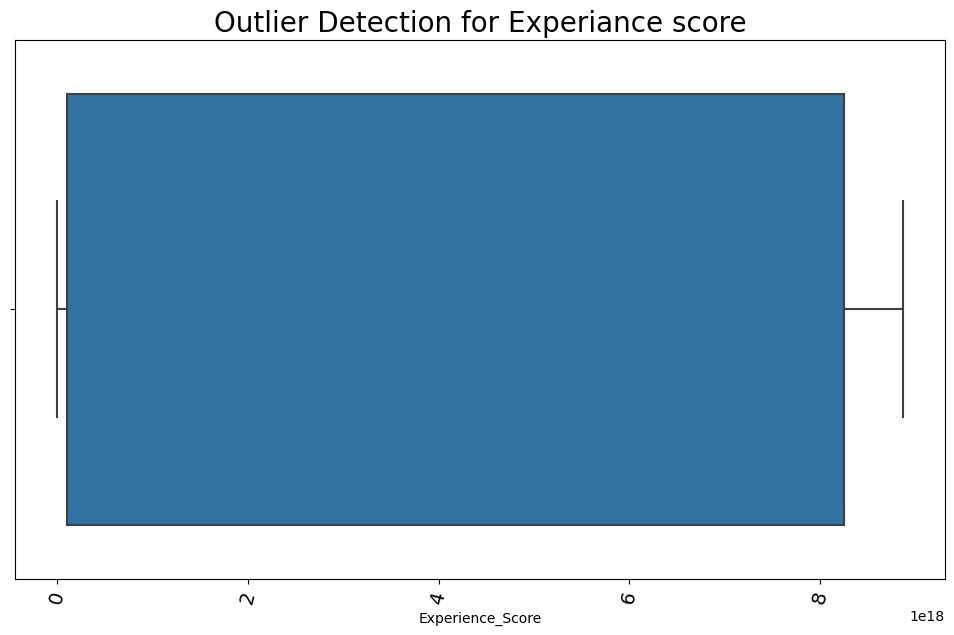

In [356]:
plot_box(score_df, 'Experience_Score', 'Outlier Detection for Experiance score')

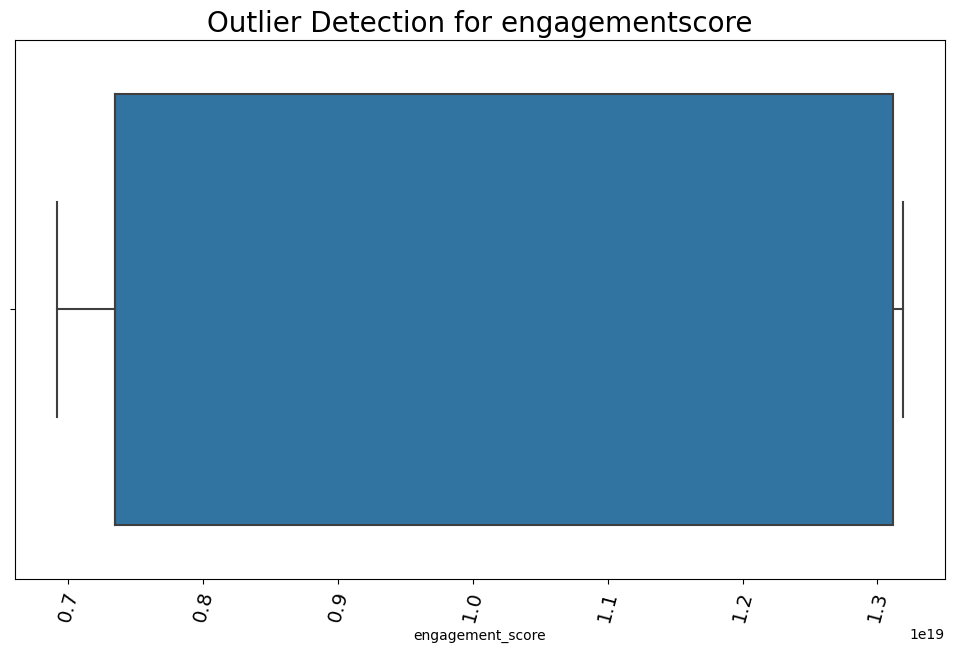

In [357]:
plot_box(score_df, 'engagement_score', 'Outlier Detection for engagementscore')

In [358]:
from sklearn.preprocessing import Normalizer, MinMaxScaler
from sklearn.cluster import KMeans


def normalizer(df, columns):
    norm = Normalizer()
    return pd.DataFrame(norm.fit_transform(df), columns=columns)

def scaler(df, columns):
    minmax_scaler = MinMaxScaler()
    return pd.DataFrame(minmax_scaler.fit_transform(df), columns=columns)

def scale_and_normalize(df,columns ):
    return normalizer(scaler(df, columns), columns)

In [359]:
normalized_data = scale_and_normalize(cleaned_score_df_df, ['engagement_score', 'Experiance_score'])
normalized_data.describe()

,engagement_score,Experiance_score
count,65944.000000,65944.000000
mean,0.503362,0.538917
std,0.464517,0.490333
min,0.000000,0.000000
25%,0.073872,0.011627
50%,0.073872,0.997268
75%,0.999932,0.997268
max,1.000000,1.000000


In [360]:
kmeans = KMeans(n_clusters=2, init='k-means++').fit(normalized_data)
pred = kmeans.predict(normalized_data)

culstered_score_df = score_df.copy()
culstered_score_df['clusters'] = pred
culstered_score_df['clusters'].value_counts()

clusters
1    35172
0    30772
Name: count, dtype: int64

Text(0.5, 1.0, 'Clusters of user engagement metric')

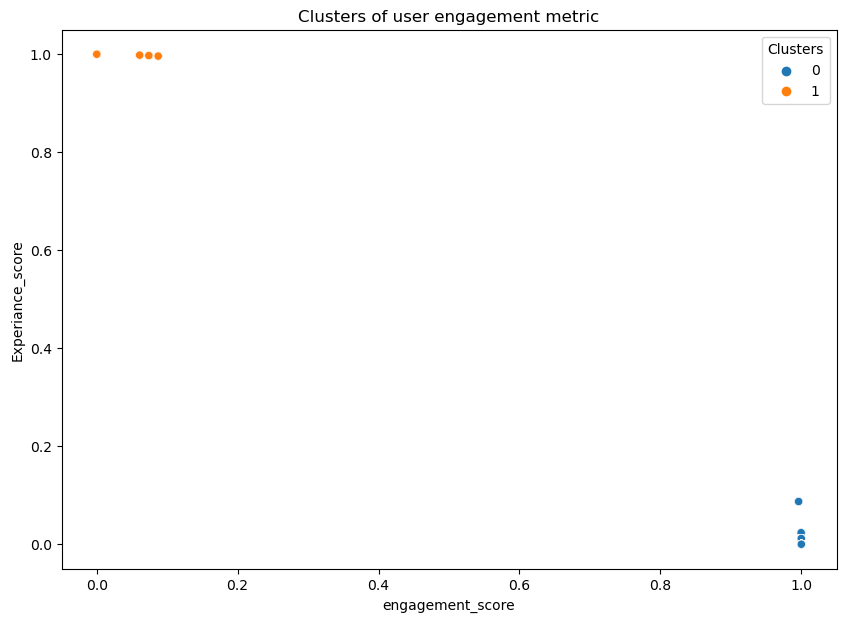

In [361]:
normalized_data2 = normalized_data.copy()
normalized_data2['Clusters'] = pred
plt.figure(figsize=(10,7))
sns.scatterplot(x = 'engagement_score', y='Experiance_score',
                hue='Clusters', data=normalized_data2).set_title('Clusters of user engagement metric')

### Aggregate the average satisfaction & experience score per cluster.

In [362]:
cluster_avg_scores =  culstered_score_df.groupby('clusters').agg({'engagement_score':'mean', 'Experience_Score':'mean',
                                           'Satisfaction_Score':'mean'})
cluster_avg_scores


,engagement_score,Experience_Score,Satisfaction_Score
clusters,,,
0,1.309583e+19,1.282818e+17,6.612057e+18
1,7.322008e+18,8.293702e+18,7.807855e+18


In [363]:
score_df

,engagement_score,Experience_Score,Satisfaction_Score
42045,6.917538e+18,8.865710e+18,7.891624e+18
7672,6.917538e+18,8.865710e+18,7.891624e+18
63756,6.917538e+18,8.865710e+18,7.891624e+18
4993,6.917538e+18,8.865710e+18,7.891624e+18
22803,6.917538e+18,8.865710e+18,7.891624e+18
...,...,...,...
48422,1.318654e+19,8.349928e+09,6.593271e+18
48874,1.318654e+19,8.068111e+09,6.593271e+18
51959,1.318654e+19,6.216225e+09,6.593271e+18
58555,1.318654e+19,3.167017e+09,6.593271e+18


In [364]:
engagement_scores

,Bearer Id,MSISDN/Number,Handset Manufacturer,Handset Type,Dur. (ms),Total Youtube Data,Total Google Data,Total Email Data,Total Netflix Data,Total Gaming Data,...,End ms,Start,End,Avg Delay (ms),Dur. (ms).1,Activity_Duration(ms),Avg Throughput (kbps),engagement_score,Experience_Score,Satisfaction_Score
0,1.311448e+19,3.368542e+10,Samsung,Samsung Galaxy A8 (2018),243504.0,32045297.0,7072799.0,3535210.0,28489330.0,522331573.0,...,829.0,1555910280000,1556153760000,127.458589,243504362.0,76881.0,69.0,1.311448e+19,1.019049e+17,6.608194e+18
1,1.311448e+19,3.366132e+10,Apple,Apple iPhone 7 (A1778),236570.0,36396501.0,5735801.0,3899599.0,21665509.0,725601428.0,...,444.0,1555913880000,1556150460000,53.000000,236570803.0,44070.0,92.0,1.311448e+19,1.019049e+17,6.608194e+18
2,1.311448e+19,3.361513e+10,Samsung,Samsung Galaxy Note 8 (Sm-N950F),231780.0,20593868.0,1000345.0,3209019.0,10640366.0,139148365.0,...,199.0,1555918680000,1556150460000,127.458589,231780395.0,69923.0,74.0,1.311448e+19,1.019049e+17,6.608194e+18
3,1.311448e+19,3.366495e+10,Huawei,Huawei P20 Lite Huawei Nova 3E,230839.0,17789231.0,9958686.0,3536943.0,19448226.0,294855187.0,...,176.0,1555919640000,1556150460000,41.000000,230839500.0,77180.0,68.0,1.311448e+19,1.019049e+17,6.608194e+18
4,7.349883e+18,3.366403e+10,Apple,Apple iPhone 6S Plus (A1687),238915.0,44496698.0,4721773.0,2498587.0,15073143.0,524941244.0,...,294.0,1555920000000,1556158920000,39.000000,238915484.0,189027.0,96.0,7.349883e+18,8.254281e+18,7.802082e+18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65939,1.311448e+19,3.362611e+10,Apple,Apple iPhone Xr (A2105),125622.0,26306531.0,12459876.0,2555578.0,40974659.0,571286842.0,...,512.0,1556522880000,1556648520000,52.000000,125622433.0,65755.0,84.0,1.311448e+19,1.019048e+17,6.608194e+18
65940,7.277826e+18,3.365069e+10,Apple,Apple iPhone 8 Plus (A1897),81230.0,27955095.0,12784914.0,690876.0,37561864.0,535806880.0,...,214.0,1556522880000,1556604120000,32.000000,81230763.0,84291.0,117.0,7.277826e+18,8.356186e+18,7.817006e+18
65941,7.349883e+18,3.366345e+10,Apple,Apple iPhone Se (A1723),97970.0,22165518.0,4415361.0,2121718.0,40643294.0,631628095.0,...,187.0,1556522880000,1556620860000,29.000000,97970704.0,34023.0,77.0,7.349883e+18,8.254281e+18,7.802082e+18
65942,1.311448e+19,3.362189e+10,Apple,Apple iPhone Xs (A2097),98249.0,24516413.0,6585469.0,2058277.0,15029702.0,566933800.0,...,810.0,1556522880000,1556621160000,49.000000,98249527.0,53643.0,90.0,1.311448e+19,1.019048e+17,6.608194e+18


In [365]:
engagement_scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65944 entries, 0 to 65943
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Bearer Id               65944 non-null  float64
 1   MSISDN/Number           65944 non-null  float64
 2   Handset Manufacturer    65944 non-null  object 
 3   Handset Type            65944 non-null  object 
 4   Dur. (ms)               65944 non-null  float64
 5   Total Youtube Data      65944 non-null  float64
 6   Total Google Data       65944 non-null  float64
 7   Total Email Data        65944 non-null  float64
 8   Total Netflix Data      65944 non-null  float64
 9   Total Gaming Data       65944 non-null  float64
 10  Other Data              65944 non-null  float64
 11  Total SocialMedia Data  65944 non-null  float64
 12  Total DL and UL         65944 non-null  float64
 13  Start ms                65944 non-null  float64
 14  End ms                  65944 non-null

In [366]:
engagement_scores.to_csv("../Telecommunication_Industry/Satisfaction_analysis.csv")